In [1]:
from __future__ import division, print_function, unicode_literals
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.reset_default_graph()
np.random.seed(42)
tf.set_random_seed(42)
import pandas as pd
from sklearn.model_selection import train_test_split
tf.reset_default_graph()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.preprocessing import StandardScaler
from keras import regularizers

/home/inderjeet78/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
c1_x = mnist.train.images[mnist.train.labels==2]
c1_y = mnist.train.labels[mnist.train.labels==2]
c1_y = c1_y[:,None]
other_x = mnist.train.images[mnist.train.labels!=2]
other_y = mnist.train.labels[mnist.train.labels!=2]
other_y=other_y[:,None]

np.random.seed(42)
c1 = np.concatenate((c1_x,c1_y),axis=1)
others = np.concatenate((other_x,other_y), axis=1)
print(c1.shape)
print(others.shape)
print(others)
np.random.shuffle(others)
others = np.array(others)
print(others.shape)
others321 = others[0:321,:]
print(others321.shape)
train = np.concatenate((c1,others321),axis=0)
np.random.shuffle(train)
X_train = train[:,0:-1]
Y_train = train[:,-1]
Y_train[Y_train==0]=1
Y_train[Y_train==2]=0
Y_train[Y_train!=0]=1

sum(Y_train)

# Validation data prepration

np.random.seed(42)
valX_ones = mnist.validation.images[mnist.validation.labels==2]
valY_ones = mnist.validation.labels[mnist.validation.labels==2]
valX_others = mnist.validation.images[mnist.validation.labels!=2]
valY_others = mnist.validation.labels[mnist.validation.labels!=2]
valY_ones = valY_ones[:,None]
valY_others = valY_others[:,None]
val_ones = np.concatenate((valX_ones,valY_ones),axis=1)
val_others = np.concatenate((valX_others,valY_others),axis=1)
np.random.shuffle(val_others)
val_others137 = val_others[0:137,:]
val = np.concatenate((val_ones,val_others137),axis=0)
np.random.shuffle(val)
valX = val[:,0:-1]
valY = val[:,-1]
valY[valY==0]=1
valY[valY==2]=0
valY[valY!=0]=1

sum(valY)

# Test data prepration

np.random.seed(42)
testX_ones = mnist.test.images[mnist.test.labels==2]
testY_ones = mnist.test.labels[mnist.test.labels==2]
testX_others = mnist.test.images[mnist.test.labels!=2]
testY_others = mnist.test.labels[mnist.test.labels!=2]
testY_ones = testY_ones[:,None]
testY_others = testY_others[:,None]
test_ones = np.concatenate((testX_ones,testY_ones),axis=1)
test_others = np.concatenate((testX_others,testY_others),axis=1)
np.random.shuffle(test_others)
test_others137 = test_others[0:137,:]
test = np.concatenate((test_ones,test_others137),axis=0)
np.random.shuffle(test)
testX = test[:,0:-1]
testY = test[:,-1]
testY[testY==0]=1
testY[testY==2]=0
testY[testY!=0]=1

(5470, 785)
(49530, 785)
[[0. 0. 0. ... 0. 0. 7.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 4.]
 ...
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 6.]
 [0. 0. 0. ... 0. 0. 8.]]
(49530, 785)
(321, 785)


# Model Prepration

In [4]:
# create model
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=512)

# evaluate the model
scores = model.evaluate(valX, valY)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions
predictions = model.predict(testX)
predictionst = model.predict(X_train)
predictionsval = model.predict(valX)
# round predictions
rounded = [round(x[0]) for x in predictions]
rounded2 = [round(x[0]) for x in predictionst]
roundedval = [round(x[0]) for x in predictionsval]

Epoch 1/10
5791/5791 [==============================] - 1s 104us/step - loss: 0.2225 - acc: 0.9363
Epoch 2/10
5791/5791 [==============================] - 0s 45us/step - loss: 0.0924 - acc: 0.9617
Epoch 3/10
5791/5791 [==============================] - 0s 46us/step - loss: 0.0624 - acc: 0.9770
Epoch 4/10
5791/5791 [==============================] - 0s 45us/step - loss: 0.0465 - acc: 0.9827
Epoch 5/10
5791/5791 [==============================] - 0s 45us/step - loss: 0.0299 - acc: 0.9903
Epoch 6/10
5791/5791 [==============================] - 0s 45us/step - loss: 0.0188 - acc: 0.9941
Epoch 7/10
5791/5791 [==============================] - 0s 44us/step - loss: 0.0104 - acc: 0.9972
Epoch 8/10
5791/5791 [==============================] - 0s 45us/step - loss: 0.0053 - acc: 0.9988
Epoch 9/10
5791/5791 [==============================] - 0s 45us/step - loss: 0.0039 - acc: 0.9990
Epoch 10/10
625/625 [==============================] - 0s 114us/step

acc: 95.84%


# Training Set Predictions

In [5]:
print("Train roc auc score is : ", roc_auc_score(Y_train,rounded2))
print("Accuracy : ",accuracy_score(Y_train,rounded2))
print("Classification report is : ")
print(classification_report(Y_train, rounded2))
print("Confusion Matrix for test set is : ")
print(confusion_matrix(Y_train,rounded2))

Train roc auc score is :  0.9984423676012462
Accuracy :  0.9998273182524607
Classification report is : 
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      5470
        1.0       1.00      1.00      1.00       321

avg / total       1.00      1.00      1.00      5791

Confusion Matrix for test set is : 
[[5470    0]
 [   1  320]]


# Validation set predictions

In [6]:
print("Test roc auc score is : ", roc_auc_score(valY,roundedval))
print("Accuracy : ",accuracy_score(valY,roundedval))
print("Classification report is : ")
print(classification_report(valY,roundedval))
print("Confusion Matrix for test set is : ")
print(confusion_matrix(valY,roundedval))

Test roc auc score is :  0.9129846236687806
Accuracy :  0.9584
Classification report is : 
             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97       488
        1.0       0.97      0.83      0.90       137

avg / total       0.96      0.96      0.96       625

Confusion Matrix for test set is : 
[[485   3]
 [ 23 114]]


# Test Set Predictions

In [7]:
print("Test roc auc score is : ", roc_auc_score(testY,rounded))
print("Accuracy : ",accuracy_score(testY,rounded))
print("Classification report is : ")
print(classification_report(testY, rounded))
print("Confusion Matrix for test set is : ")
print(confusion_matrix(testY,rounded))

Test roc auc score is :  0.9423484977083687
Accuracy :  0.9820359281437125
Classification report is : 
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1032
        1.0       0.95      0.89      0.92       137

avg / total       0.98      0.98      0.98      1169

Confusion Matrix for test set is : 
[[1026    6]
 [  15  122]]


# ROC AUC Curve

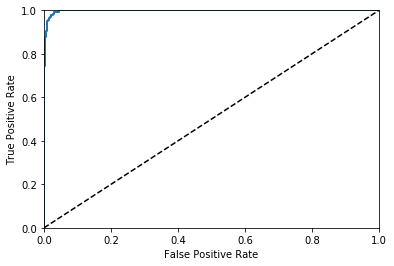

ROC AUC score is:  0.9979347026537657


In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(testY,predictions)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()


print("ROC AUC score is: ",roc_auc_score(testY,predictions))
